In [1]:
from mlconfound.stats import test_partially_confounded, test_fully_confounded
from mlconfound.simulate import simulate_y_c_yhat
from mlconfound.plot import plot_null_dist, plot_graph

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

# Simulate some data for the null hypotheses

In [2]:
H0_y, H0_c, H0_yhat = simulate_y_c_yhat(cov_y_c=0.3,
                      y_ratio_yhat=0.5, c_ratio_yhat=0,
                      n=500, random_state=None)

# Do the tests for H0 simulation

In [3]:
ret=test_partially_confounded(H0_y, H0_yhat, H0_c, num_perms=1000, return_null_dist=True,
                  random_state=42)
#pretty print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})


Permuting: 100%|██████████| 1000/1000 [00:01<00:00, 601.87it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.419,0.388197,0.450282,0.085397,0.045044,0.498575


## Use the built-in plot functions:

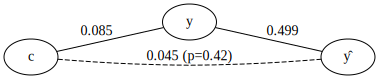

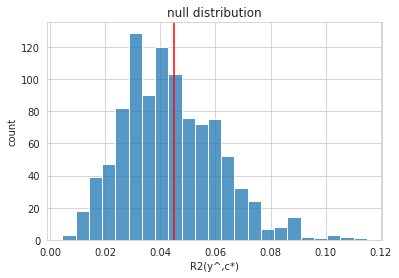

In [4]:
plot_null_dist(ret)
plot_graph(ret)

# Do the tests for H1 simulation

In [5]:
H1_y, H1_c, H1_yhat = simulate_y_c_yhat(cov_y_c=0.3,
                      y_ratio_yhat=0.4, c_ratio_yhat=0.2,
                      n=500, random_state=None)
ret=test_partially_confounded(H1_y, H1_yhat, H1_c, num_perms=1000, return_null_dist=True,
                  random_state=42, n_jobs=-1)

#pretty print results
pd.DataFrame({
    'p' : [ret.p],
    'ci lower' : [ret.p_ci[0]],
    'ci upper' : [ret.p_ci[1]],
    'R2(y,c)' : [ret.r2_y_c],
    'R2(y^,c)' : [ret.r2_yhat_c],
    'R2(y,y^)' : [ret.r2_y_yhat],
})

Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1239.93it/s]


,p,ci lower,ci upper,"R2(y,c)","R2(y^,c)","R2(y,y^)"
0,0.0,0,0.003682,0.082988,0.208149,0.504215


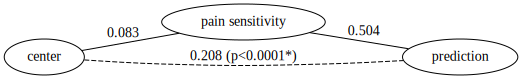

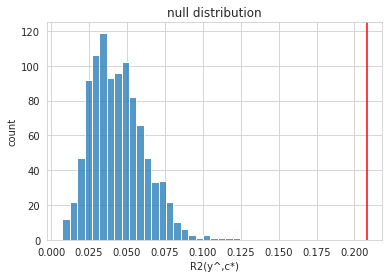

In [6]:
plot_null_dist(ret)
plot_graph(ret, y_name='pain sensitivity', yhat_name='prediction', c_name='center', outfile_base='example')